## Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import plotly.express as px
import missingno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New Section

## Load Data

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號

Mounted at /content/gdrive


In [ ]:
file_path="/content/gdrive/MyDrive/Data Mining SMU/adult.csv"
df=pd.read_csv(file_path, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wages'])
# You can add your own file path in your computer

In [ ]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  wages           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df2=df.copy()

### Replicate data with fnlwgt

In [ ]:
data=pd.DataFrame(df2.values.repeat(round(df2.fnlwgt/10000), axis=0), columns=df2.columns)

In [ ]:
# newdata2=newdata1.copy()

In [ ]:
num = ['age','education-num','capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
data[num]=data[num].astype(int)

### Q1&Q2

In [ ]:
# 1,2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617870 entries, 0 to 617869
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   age             617870 non-null  int64 
 1   workclass       617870 non-null  object
 2   fnlwgt          617870 non-null  object
 3   education       617870 non-null  object
 4   education-num   617870 non-null  int64 
 5   marital-status  617870 non-null  object
 6   occupation      617870 non-null  object
 7   relationship    617870 non-null  object
 8   race            617870 non-null  object
 9   sex             617870 non-null  object
 10  capital-gain    617870 non-null  int64 
 11  capital-loss    617870 non-null  int64 
 12  hours-per-week  617870 non-null  int64 
 13  native-country  617870 non-null  object
 14  wages           617870 non-null  object
dtypes: int64(5), object(10)
memory usage: 70.7+ MB


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wages
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
3,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
4,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


###Q3

In [ ]:
# 3
data['education-num'] = pd.Categorical(data['education-num'])
data.dtypes

age                  int64
workclass           object
fnlwgt              object
education           object
education-num     category
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
wages               object
dtype: object

In [ ]:
data['wages'] = data['wages'].apply(lambda x:x.replace("<=50K", "0"))
data['wages'] = data['wages'].apply(lambda x:x.replace(">50K", "1"))
# data['wages'] = data['wages'].astype(int)

In [ ]:
numerical_var = [col for col in df.columns if data[col].dtype != object and data[col].dtype.name != 'category']
categorical_var = [col for col in df.columns if data[col].dtype == object or data[col].dtype.name == 'category']
print(numerical_var)
print(categorical_var)

['age', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'wages']


### Q4

In [ ]:
# 4
a=df[numerical_var].describe()
b=df[numerical_var].agg(['mean', 'std', 'skew', 'kurtosis'])
c=df[numerical_var].isnull().sum()
c=pd.DataFrame(c, columns = ['Null'])
c=np.transpose(c)
pd.concat([a, b, c])


,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429


### Q5

#### I also change numerical outlier into the 90&10 quantile in this part(Numerical missing value processing)

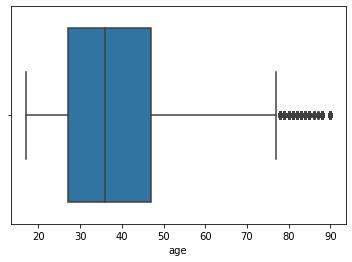

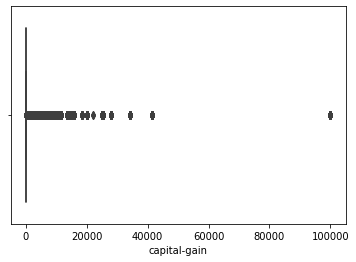

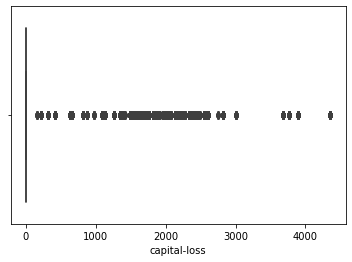

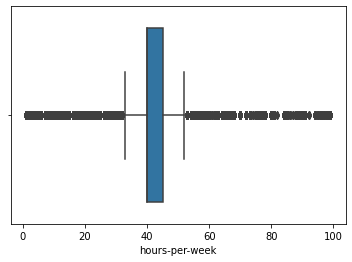

In [ ]:
for i in numerical_var:
  sns.boxplot(x = data[i])
  plt.show()
# I will not calculate outlier in age, fnlwgt, hours per week and wages. 

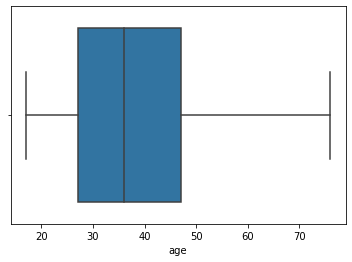

In [ ]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
upper = data['age'].quantile(0.90)
lower = data['age'].quantile(0.10)
IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (cg['capital-gain'] >= Q1 - 1.5 * IQR) & (cg['capital-gain'] <= Q3 + 1.5 *IQR)
# df.loc[filter]
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
for i in range(len(data['age'])):
  # print(data['capital-gain'].iloc[i])
  if data['age'].iloc[i] >= upper_bound:
    data['age'].iloc[i] = upper
  elif data['age'].iloc[i] <= lower_bound:
    data['age'].iloc[i] = lower
  else:
    continue
sns.boxplot(x = data['age'])
plt.show()
# I change the outlier to the 10&90 quartile numbers

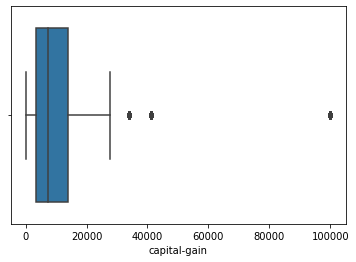

In [ ]:
cg = data[data['capital-gain'] != 0]
cg
sns.boxplot(x = cg['capital-gain'])
plt.show()

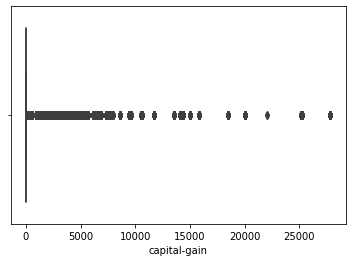

In [ ]:
Q1 = cg['capital-gain'].quantile(0.25)
Q3 = cg['capital-gain'].quantile(0.75)
upper = cg['capital-gain'].quantile(0.90)
lower = cg['capital-gain'].quantile(0.10)
IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (cg['capital-gain'] >= Q1 - 1.5 * IQR) & (cg['capital-gain'] <= Q3 + 1.5 *IQR)
# df.loc[filter]
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
for i in range(len(data['capital-gain'])):
  # print(data['capital-gain'].iloc[i])
  if data['capital-gain'].iloc[i] >= upper_bound:
    data['capital-gain'].iloc[i] = upper
  elif data['capital-gain'].iloc[i] <= lower_bound:
    data['capital-gain'].iloc[i] = lower
  else:
    continue
sns.boxplot(x = data['capital-gain'])
plt.show()
# I change the outlier to the 10&90 quartile numbers

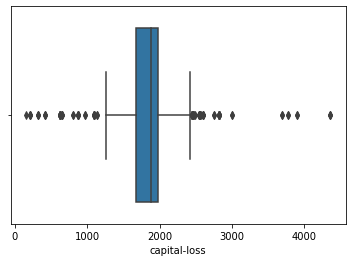

In [ ]:
cl = df[df['capital-loss'] != 0]
cl
sns.boxplot(x = cl['capital-loss'])
plt.show()

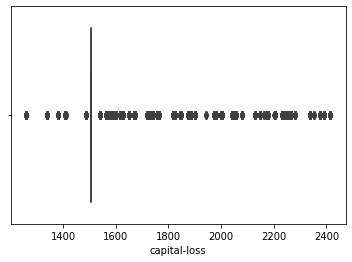

In [ ]:
Q1 = cl['capital-loss'].quantile(0.25)
Q3 = cl['capital-loss'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
upper = cl['capital-loss'].quantile(0.90)
lower = cl['capital-loss'].quantile(0.10)
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
for i in range(len(data['capital-gain'])):
  # print(data['capital-gain'].iloc[i])
  if data['capital-loss'].iloc[i] >= upper_bound:
    data['capital-loss'].iloc[i] = upper
  elif data['capital-loss'].iloc[i] <= lower_bound:
    data['capital-loss'].iloc[i] = lower
  else:
    continue
# outlierscl = cl['capital-loss'][(cl['capital-loss'] <= lower_bound) | (cl['capital-loss'] >= upper_bound)]
# print('The following are the outliers in the boxplot:{}'.format(outlierscl))
# outlierscl.index
sns.boxplot(x = data['capital-loss'])
plt.show()
# I change the outlier to the 10&90 quartile numbers

In [ ]:
data.describe()

,age,capital-gain,capital-loss,hours-per-week
count,617870.000000,617870.000000,617870.000000,617870.000000
mean,37.873677,651.574195,1520.729220,40.309439
std,13.158316,2674.619844,93.897688,12.096580
min,17.000000,0.000000,1258.000000,1.000000
25%,27.000000,0.000000,1504.000000,40.000000
50%,36.000000,0.000000,1504.000000,40.000000
75%,47.000000,0.000000,1504.000000,45.000000
max,76.000000,27828.000000,2415.000000,99.000000


###Q6

In [ ]:
# 6
data[categorical_var].agg(['nunique'])

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,wages
nunique,9,21648,16,16,7,15,6,5,2,42,2


In [ ]:
# 6
[(i, data[i].unique()) for i in categorical_var]

[('workclass',
  array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
         ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
         ' Never-worked'], dtype=object)),
 ('fnlwgt',
  array([77516, 83311, 215646, ..., 34066, 84661, 257302], dtype=object)),
 ('education', array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
         ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
         ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
         ' Preschool', ' 12th'], dtype=object)),
 ('education-num', [13, 9, 7, 14, 5, ..., 3, 6, 2, 1, 8]
  Length: 16
  Categories (16, int64): [1, 2, 3, 4, ..., 13, 14, 15, 16]),
 ('marital-status',
  array([' Never-married', ' Married-civ-spouse', ' Divorced',
         ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
         ' Widowed'], dtype=object)),
 ('occupation',
  array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
         ' Prof-specialty', ' Other-service', ' 

In [ ]:
print("# of NaN in each columns:", data.isnull().sum(), sep='\n')

# of NaN in each columns:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wages             0
dtype: int64


###Q7

#### Categorical missing value processing

In [ ]:
data[data['workclass'].str.contains('?', regex=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wages
481,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,1504,60,South,1
482,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,1504,60,South,1
483,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,1504,60,South,1
484,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,1504,60,South,1
485,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,1504,60,South,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617546,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1504,25,United-States,0
617547,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1504,25,United-States,0
617548,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1504,25,United-States,0
617549,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1504,25,United-States,0


In [ ]:
# 7
dft=data[data['workclass'].str.contains('?', regex=False)]
dft2=data[data['occupation'].str.contains('?', regex=False)]
dft3=data[data['native-country'].str.contains('?', regex=False)]
# print(dft.index)
# print(dft2.index)
# print(dft3.index)
ind=dft.index.union(dft2.index).union(dft3.index)
print(ind)
# The rows that contains ?, maybe can set to NULL or dropp off.

Int64Index([   256,    257,    258,    259,    260,    261,    262,    263,
               264,    265,
            ...
            617541, 617542, 617543, 617544, 617545, 617546, 617547, 617548,
            617549, 617550],
           dtype='int64', length=45461)


In [ ]:
wc=len(dft.index)/len(data)*100
oc=len(dft2.index)/len(data)*100
nc=len(dft3.index)/len(data)*100
print('Missing value length:\nworkclass: {}\noccupation: {}\nnative-country: {}'.format(len(dft.index),len(dft2.index),len(dft3.index)))
print('Missing value ratios:\nworkclass: {}\noccupation: {}\nnative-country: {}'.format(wc,oc,nc))

Missing value length:
workclass: 34582
occupation: 34741
native-country: 11277
Missing value ratios:
workclass: 5.596970236457508
occupation: 5.622703805007526
native-country: 1.825141210934339


In [ ]:
# list(ind)
data['workclass'].loc[list(dft.index)]=np.nan
data['occupation'].loc[list(dft2.index)]=np.nan
data['native-country'].loc[list(dft3.index)]=np.nan
print(data[categorical_var].isnull().sum())
# print(data.isnull().sum())
# data.loc[data.index.isin(ind)] = np.nan
# data.info()
# take away the ?

workclass         34582
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation        34741
relationship          0
race                  0
sex                   0
native-country    11277
wages                 0
dtype: int64


In [ ]:
cat_symbol = ['workclass', 'occupation', 'native-country']
data[cat_symbol].describe()

,workclass,occupation,native-country
count,583288,583129,606593
unique,8,14,41
top,Private,Craft-repair,United-States
freq,437489,78754,545593


In [ ]:
data['occupation'].mode()[0]

' Craft-repair'

In [ ]:
# Imputing ? with mode
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wages             0
dtype: int64


##EDA

### Numerical Data EDA (Q8)

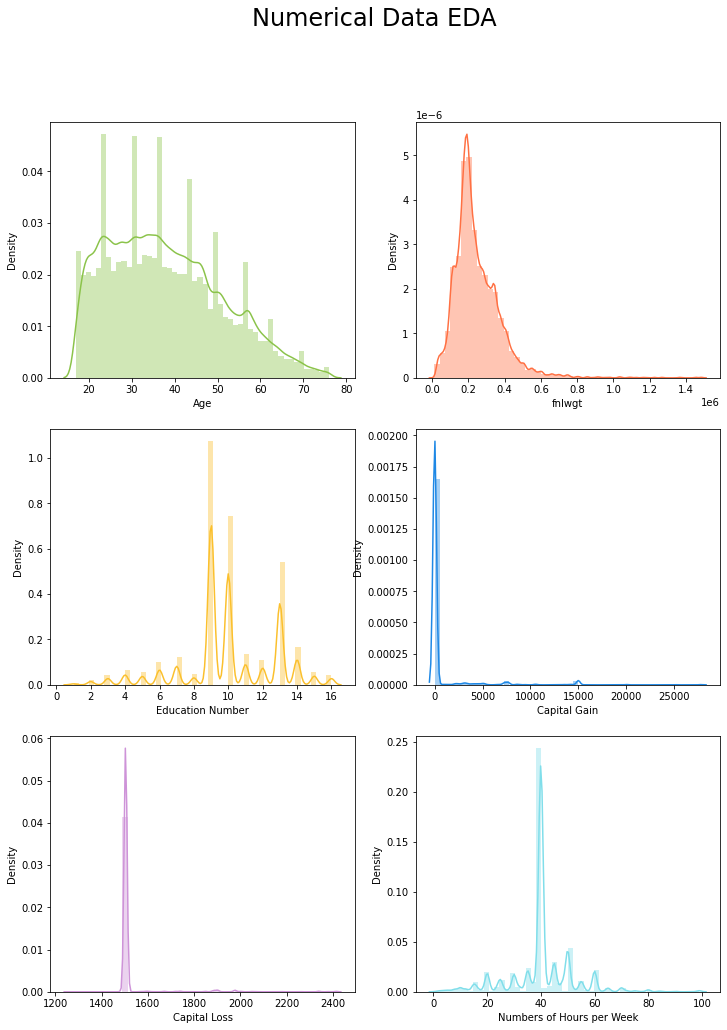

In [ ]:
plt.figure(figsize=(12,16))
plt.suptitle("Numerical Data EDA", fontsize=24)

plt.subplot(321)
sns.distplot(x=data['age'], axlabel='Age', color='#8BC34A')
plt.subplot(322)
sns.distplot(x=data['fnlwgt'], axlabel='fnlwgt', color='#FF7043');
plt.subplot(323)
sns.distplot(x = data['education-num'], axlabel='Education Number', color = '#FBC02D')
# Looks like categorical data
plt.subplot(324)
sns.distplot(x = data['capital-gain'], axlabel='Capital Gain', color = '#1E88E5')
plt.subplot(325)
sns.distplot(x = data['capital-loss'], axlabel='Capital Loss', color = '#CE93D8')
plt.subplot(326)
sns.distplot(x = data['hours-per-week'], axlabel='Numbers of Hours per Week', color = '#80DEEA')

### Categorical Data EDA(Q9)

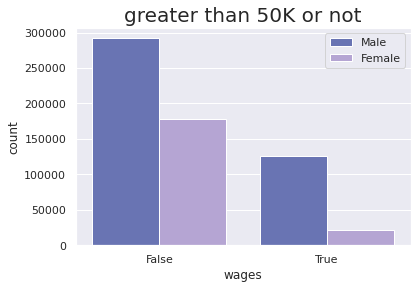

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 
def update_ticks(x,pos):
    if x == 0:
        return 'False'
    if x==1:
        return 'True'
sns.set(style = "darkgrid")
plt.title("greater than 50K or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "wages", hue = 'sex', data = data, palette=["#5C6BC0","#B39DDB"])
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))
ax.legend(["Male", "Female"], loc=1)
# , palette=["mediumorchid","indigo"]

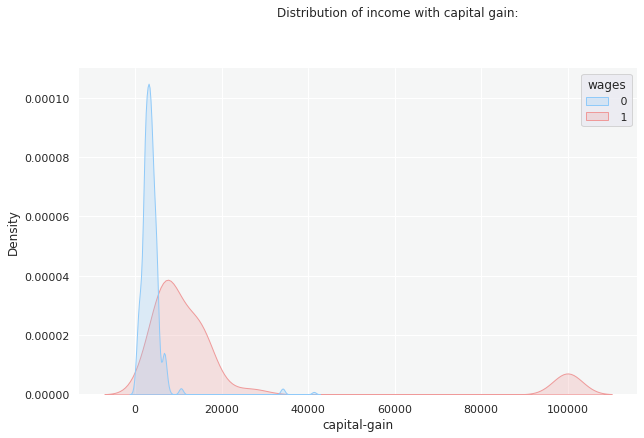

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=cg["capital-gain"],hue=cg["wages"],fill=True,palette=["#90CAF9","#EF9A9A"])
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with capital gain:", alpha = 1)
# fig.text(0.1,0.90,"First of all most of the adults have income less than 50k \n But With increasing in age Income is also increasing :", alpha = 1)


fig.show()

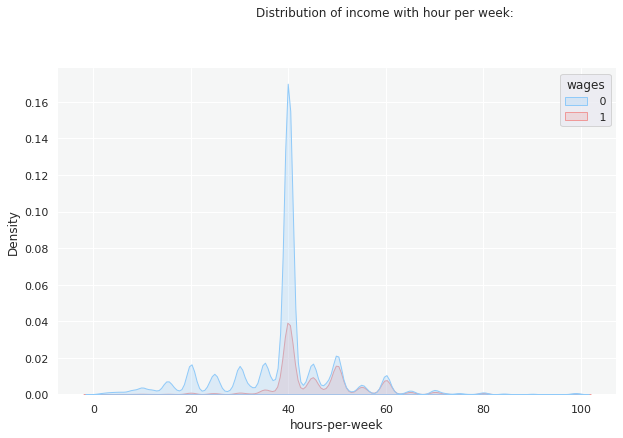

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=data["hours-per-week"],hue=data["wages"],fill=True,palette=["#90CAF9","#EF9A9A"])
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with hour per week:", alpha = 1)
# fig.text(0.1,0.90,"First of all most of the adults have income less than 50k \n But With increasing in age Income is also increasing :", alpha = 1)


fig.show()

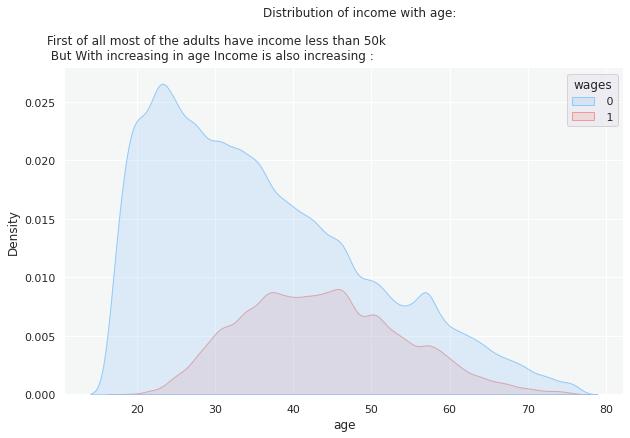

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=sns.kdeplot(x=data["age"],hue=data["wages"],fill=True,palette=["#90CAF9","#EF9A9A"])
ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
 
fig.text(0.4,1,"Distribution of income with age:", alpha = 1)
fig.text(0.1,0.90,"First of all most of the adults have income less than 50k \n But With increasing in age Income is also increasing :", alpha = 1)


fig.show()

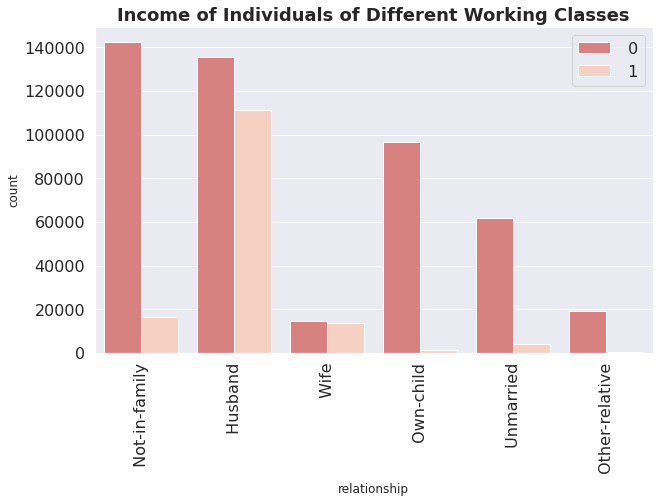

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['relationship'], hue = data['wages'], palette=["#E57373","#FFCCBC"])
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

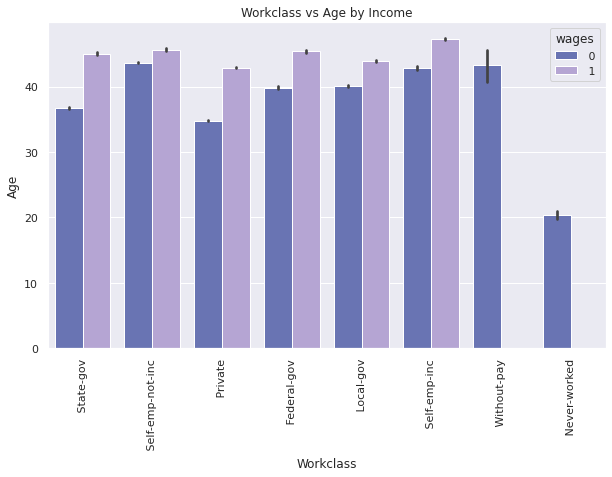

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x="workclass",y="age", hue="wages", data=data, palette=["#5C6BC0","#B39DDB"])
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Workclass vs Age by Income")
plt.xticks(rotation = 90)
plt.show()

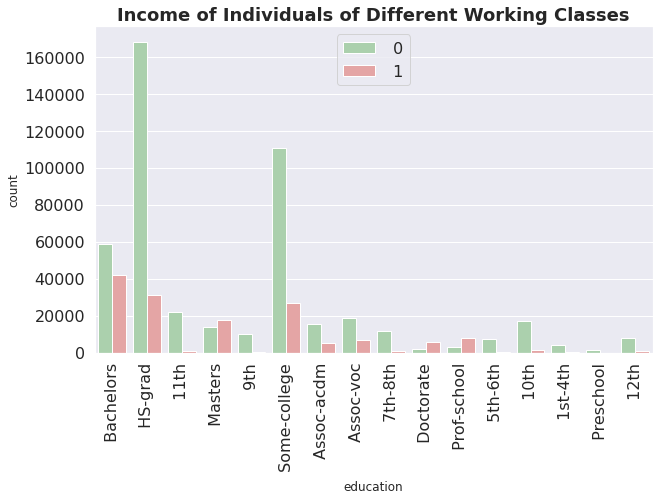

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['education'], hue = data['wages'], palette=["#A5D6A7","#EF9A9A"])
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

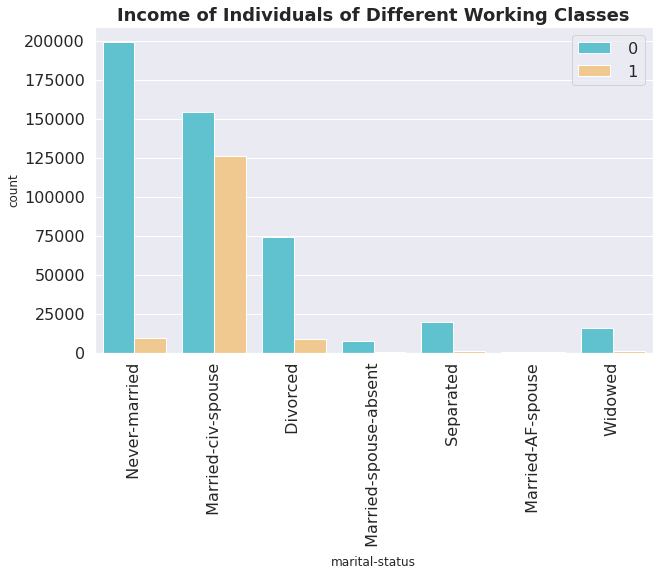

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['marital-status'], hue = data['wages'], palette=["#4DD0E1","#FFCC80"])
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

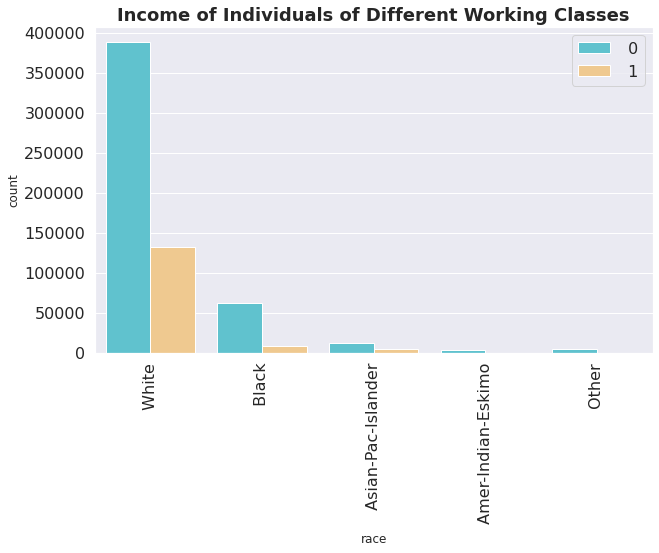

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['race'], hue = data['wages'], palette=["#4DD0E1","#FFCC80"])
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

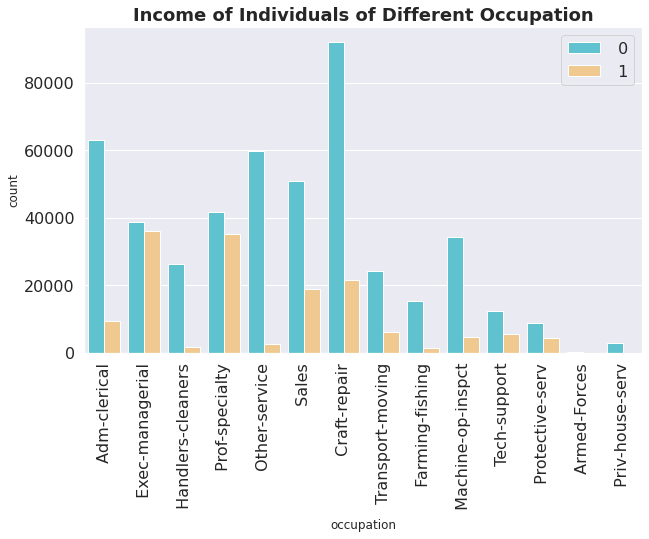

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['occupation'], hue = data['wages'], palette=["#4DD0E1","#FFCC80"])
plt.title('Income of Individuals of Different Occupation', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

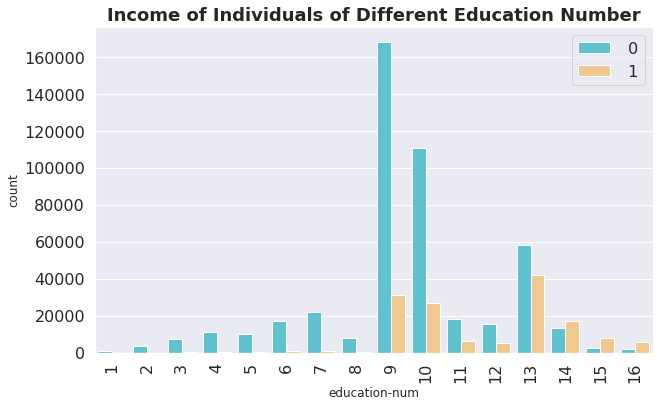

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['education-num'], hue = data['wages'], palette=["#4DD0E1","#FFCC80"])
plt.title('Income of Individuals of Different Education Number', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

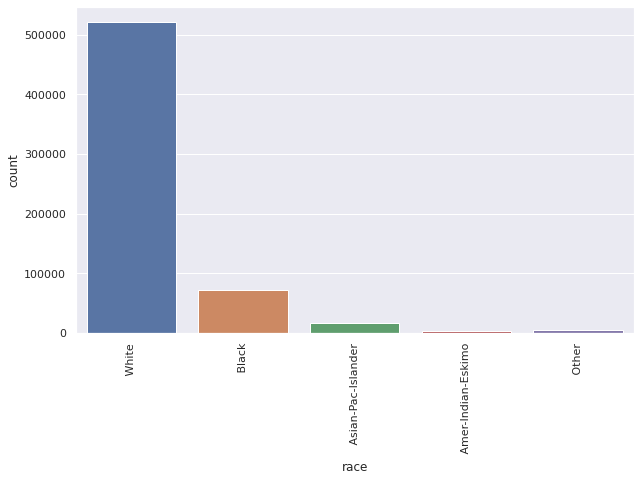

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'race', data = data);
plt.xticks(rotation = 90);

In [ ]:
data['wages'] = data['wages'].apply(lambda x:x.replace("<=50K", "0"))
data['wages'] = data['wages'].apply(lambda x:x.replace(">50K", "1"))
data['wages'] = data['wages'].astype(int)

AttributeError: ignored

Text(0.5, 1.0, 'Country-wise Income')

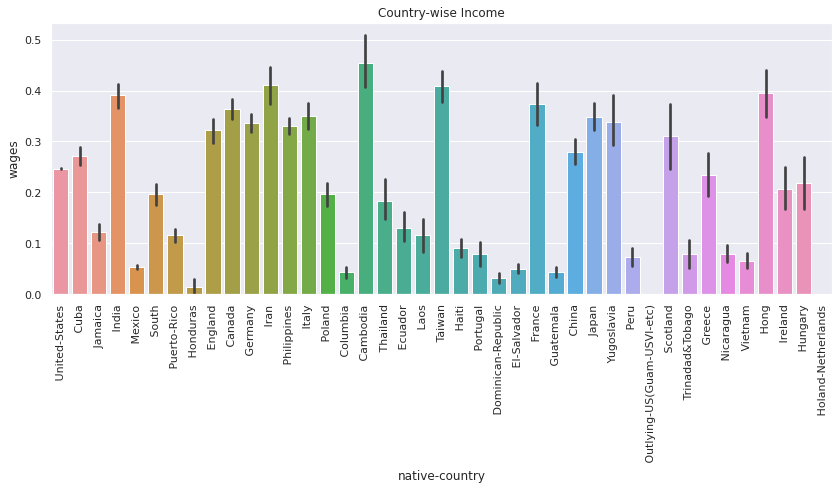

In [ ]:
sns.set(style = 'darkgrid', font_scale = 1)
plt.figure(figsize = (14,5))
sns.barplot(x = 'native-country', y = 'wages', data = data);
plt.xticks(rotation = 90);
plt.title('Country-wise Income')

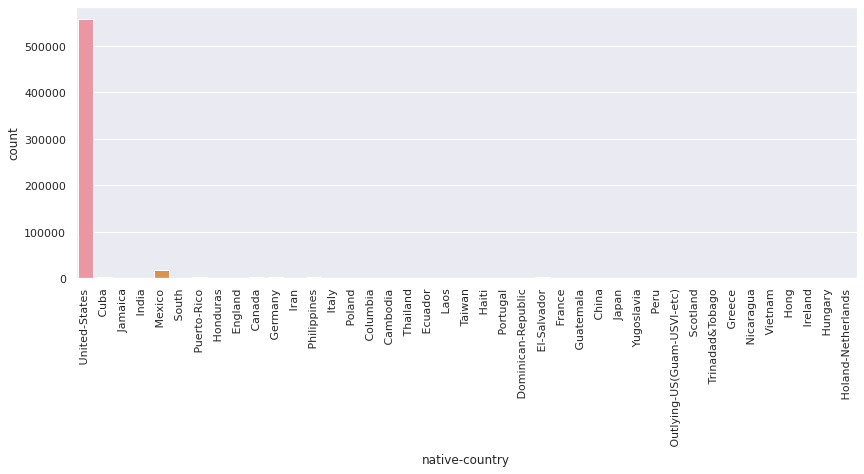

In [ ]:
plt.figure(figsize = (14,5))

sns.countplot(x = 'native-country', data = data);
plt.xticks(rotation = 90);

## Encoding and Feature Scaling

In [ ]:
newdata2=data.copy()

In [ ]:
newdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617870 entries, 0 to 617869
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   age             617870 non-null  float64 
 1   workclass       617870 non-null  object  
 2   fnlwgt          617870 non-null  int64   
 3   education       617870 non-null  object  
 4   education-num   617870 non-null  category
 5   marital-status  617870 non-null  object  
 6   occupation      617870 non-null  object  
 7   relationship    617870 non-null  object  
 8   race            617870 non-null  object  
 9   sex             617870 non-null  object  
 10  capital-gain    617870 non-null  float64 
 11  capital-loss    617870 non-null  float64 
 12  hours-per-week  617870 non-null  int64   
 13  native-country  617870 non-null  object  
 14  wages           617870 non-null  int64   
dtypes: category(1), float64(3), int64(3), object(8)
memory usage: 66.6+ MB


### Get parameters

In [ ]:
features = [
    'age', 'workclass', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
]

# Preparation of arguments for ``scikit-learn`` library methods
X = newdata2[features].values

### Label encoding the categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

lbp = LabelEncoder()
X[:, 1] = lbp.fit_transform(X[:, 1])

X[:, 2] = lbp.fit_transform(X[:, 2])

X[:, 3] = lbp.fit_transform(X[:, 3])

X[:, 4] = lbp.fit_transform(X[:, 4])

X[:, 5] = lbp.fit_transform(X[:, 5])

X[:, 6] = lbp.fit_transform(X[:, 6])
X
X[:, 7] = lbp.fit_transform(X[:, 7])

X[:, 8] = lbp.fit_transform(X[:, 8])

X[:, 12] = lbp.fit_transform(X[:, 12])

In [ ]:
LE = LabelEncoder()

y = LE.fit_transform(newdata2["wages"])

### Normalize the numerical data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.08559785,  2.68479043, -0.31585579, ..., -0.17816449,
        -0.02558071,  0.28357421],
       [ 0.08559785,  2.68479043, -0.31585579, ..., -0.17816449,
        -0.02558071,  0.28357421],
       [ 0.08559785,  2.68479043, -0.31585579, ..., -0.17816449,
        -0.02558071,  0.28357421],
       ...,
       [ 1.07356704,  0.84634592,  0.1945956 , ..., -0.17816449,
        -0.02558071,  0.28357421],
       [ 1.07356704,  0.84634592,  0.1945956 , ..., -0.17816449,
        -0.02558071,  0.28357421],
       [ 1.07356704,  0.84634592,  0.1945956 , ..., -0.17816449,
        -0.02558071,  0.28357421]])

### Dealing with the skewness of y

In [ ]:
np.bincount(y)

array([470451, 147419])

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)

RandomOverSampler(random_state=30, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [ ]:
X_new,y_new = rs.fit_resample(X, y)
# y_new.value_counts(normalize=True)
np.bincount(y_new)

array([470451, 470451])

## Model Building

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X_new, y_new, test_size = 0.3, random_state = 0)

In [ ]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [ ]:
#LogisticRegression
lr.fit(x_train,Y_train)
y_pred_lr = lr.predict(x_test)

#GaussianNB/ Naive Byers
gn.fit(x_train,Y_train)
y_pred_gn = gn.predict(x_test)

#RandomForestClassifier
rf.fit(x_train,Y_train)
y_pred_rf = rf.predict(x_test)

#DecisionTreeClassifier
dt.fit(x_train,Y_train)
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Naive Bayes(Q10)

In [ ]:
import sklearn.metrics
import math
def matrix_metrix(real_values,pred_values):
   CM = confusion_matrix(real_values,pred_values)
   TN = CM[0][0]
   FN = CM[1][0] 
   TP = CM[1][1]
   FP = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   MisClassification = 1-Accuracy
   Precision  = round( TP / (TP+FP),4 )
  #  NPV        = round( TN / (TN+FN),4 )
  #  FDR        = round( FP / (TP+FP),4 )
  #  FOR        = round( FN / (TN+FN),4 ) 
  #  check_Pos  = Precision + FDR
  #  check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
  #  FPR        = round( FP / (TN+FP),4 )
  #  FNR        = round( FN / (TP+FN),4 )
   Specificity    = round( TN / (TN+FP),4 ) 
  #  check_Pos2 = Recall + FNR
  #  check_Neg2 = FPR + Specificity
  #  LRPos      = round( Recall/FPR,4 ) 
  #  LRNeg      = round( FNR / Specificity ,4 )
  #  DOR        = round( LRPos/LRNeg)
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
  #  FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
  #  MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
  #  BM         = Recall+Specificity-1
  #  MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','MisClassification','Precision','Recall','Specificity','F1'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,MisClassification,Precision,Recall,Specificity,F1]})
   return (mat_met)

In [ ]:
print("GaussianNB/ Naive Bayes:")
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(Y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(Y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Bayes:
Accuracy score: 73.857
F1 Score:  68.619
MSE:  26.143


In [ ]:
print(classification_report(Y_test,  y_pred_gn))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78    141252
           1       0.86      0.57      0.69    141019

    accuracy                           0.74    282271
   macro avg       0.77      0.74      0.73    282271
weighted avg       0.77      0.74      0.73    282271



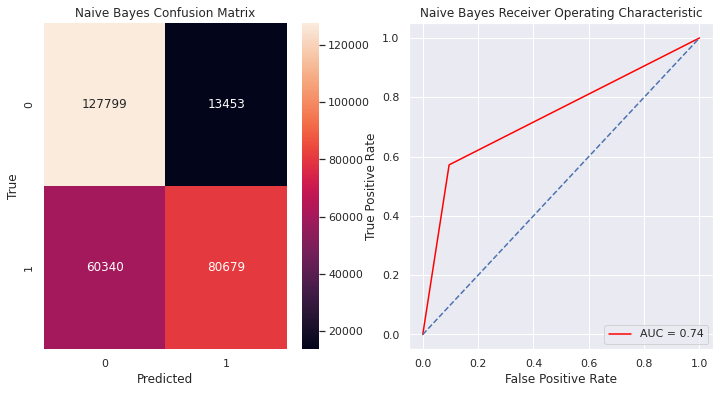

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(Y_test, y_pred_gn),annot = True, fmt = 'd')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
from sklearn import metrics
plt.subplot(122)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_gn)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
mat_met = matrix_metrix(Y_test, y_pred_gn)
print (mat_met)


               Metric        Value
0                  TP   80679.0000
1                  TN  127799.0000
2                  FP   13453.0000
3                  FN   60340.0000
4          Prevalence       0.3300
5            Accuracy       0.7386
6   MisClassification       0.2614
7           Precision       0.8571
8              Recall       0.5721
9         Specificity       0.9048
10                 F1       0.6862


### Logistic Regression(Q11)

In [ ]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(Y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(Y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(Y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 77.774
F1 Score:  77.793
MSE:  22.226


In [ ]:
print(classification_report(Y_test,  y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78    141252
           1       0.78      0.78      0.78    141019

    accuracy                           0.78    282271
   macro avg       0.78      0.78      0.78    282271
weighted avg       0.78      0.78      0.78    282271



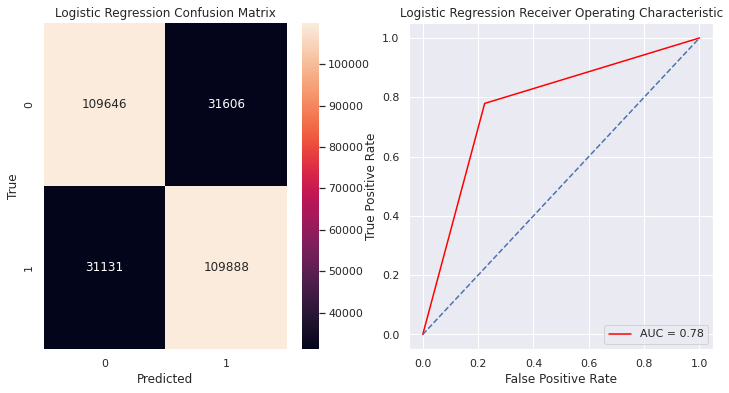

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(Y_test, y_pred_lr),annot = True, fmt = 'd')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.subplot(122)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(Y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.477619
         Iterations 8


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               658631
Model:                          Logit   Df Residuals:                   658618
Method:                           MLE   Df Model:                           12
Date:                Thu, 11 Nov 2021   Pseudo R-squ.:                  0.3109
Time:                        03:53:43   Log-Likelihood:            -3.1457e+05
converged:                       True   LL-Null:                   -4.5653e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4965      0.004    137.601      0.000       0.489       0.504
x2            -0.0720      0.003    -24.336      0.000      -0.078      -0.066
x3             0.0352      0.004      9.833      0.0

In [ ]:
# performing predictions on the test datdaset
yhat = log_reg.predict(x_test)
prediction = list(map(round, yhat))
from sklearn.metrics import (confusion_matrix, accuracy_score)
 
# confusion matrix
cm = confusion_matrix(Y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y_test, prediction))

Confusion Matrix : 
 [[ 96637  44615]
 [ 21126 119893]]
Test accuracy =  0.7670997020593685


In [ ]:
mat_met = matrix_metrix(Y_test, y_pred_lr)
print (mat_met)

               Metric        Value
0                  TP  109888.0000
1                  TN  109646.0000
2                  FP   31606.0000
3                  FN   31131.0000
4          Prevalence       0.5000
5            Accuracy       0.7777
6   MisClassification       0.2223
7           Precision       0.7766
8              Recall       0.7792
9         Specificity       0.7762
10                 F1       0.7779


### Decision Tree(Q12)

In [ ]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(Y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(Y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 97.815
F1 Score:  97.839
MSE:  2.185


In [ ]:
print(classification_report(Y_test,  y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    141252
           1       0.97      0.99      0.98    141019

    accuracy                           0.98    282271
   macro avg       0.98      0.98      0.98    282271
weighted avg       0.98      0.98      0.98    282271



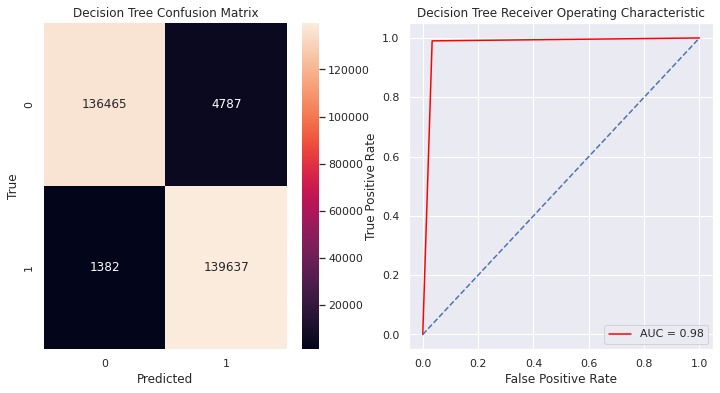

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(Y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.subplot(122)
# y_pred_proba = clf.predict_proba(x_test)[::,1]
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
plt.title('Decision Tree Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
mat_met = matrix_metrix(Y_test, y_pred_dt)
print (mat_met)

               Metric        Value
0                  TP  139637.0000
1                  TN  136465.0000
2                  FP    4787.0000
3                  FN    1382.0000
4          Prevalence       0.5100
5            Accuracy       0.9781
6   MisClassification       0.0219
7           Precision       0.9669
8              Recall       0.9902
9         Specificity       0.9661
10                 F1       0.9784


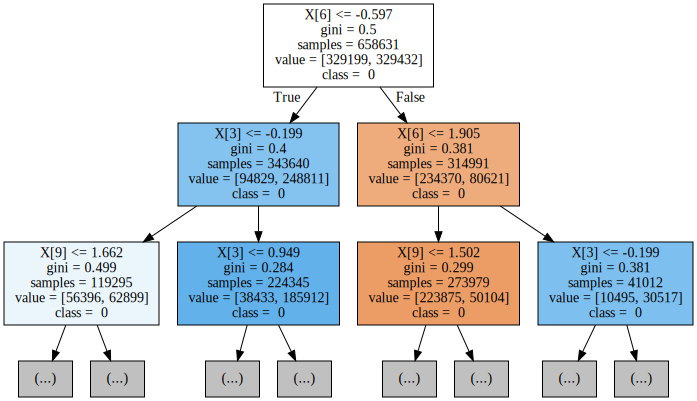

In [ ]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None,  
                    class_names=newdata2.wages.astype(str), filled=True, max_depth=2)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### Random Forest(Additional)(I ask Professor, since we have split the data, there's no overfitting problem)

In [ ]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(Y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(Y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(Y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 97.815
F1 Score:  97.84
MSE:  2.185


In [ ]:
rf.score(x_train, Y_train)

0.9782336391697324

In [ ]:
rf.score(x_test, Y_test)

0.9781274023899019

In [ ]:
print(classification_report(Y_test,  y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    141252
           1       0.97      0.99      0.98    141019

    accuracy                           0.98    282271
   macro avg       0.98      0.98      0.98    282271
weighted avg       0.98      0.98      0.98    282271



Text(0.5, 0, 'False Positive Rate')

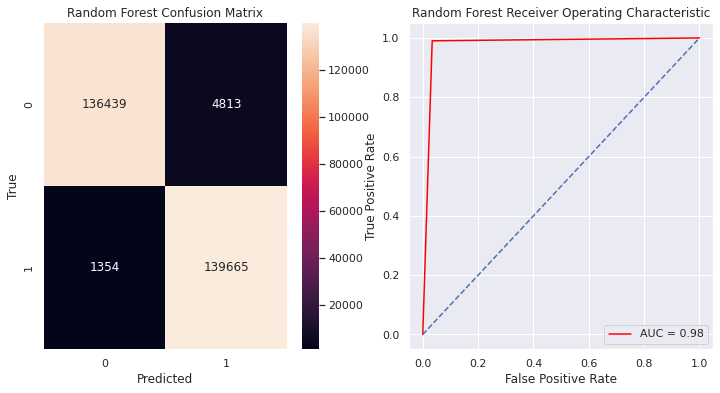

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.subplot(122)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
plt.title('Random Forest Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
mat_met = matrix_metrix(Y_test, y_pred_rf)
print (mat_met)

               Metric        Value
0                  TP  139665.0000
1                  TN  136439.0000
2                  FP    4813.0000
3                  FN    1354.0000
4          Prevalence       0.5100
5            Accuracy       0.9782
6   MisClassification       0.0218
7           Precision       0.9667
8              Recall       0.9904
9         Specificity       0.9659
10                 F1       0.9784


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf.fit(x_train,Y_train)).fit(x_test, Y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.1815 ± 0.0009,age
0.1476 ± 0.0006,relationship
0.1469 ± 0.0005,occupation
0.1356 ± 0.0007,hours-per-week
0.1349 ± 0.0008,education-num
0.0833 ± 0.0008,capital-gain
0.0639 ± 0.0006,workclass
0.0505 ± 0.0007,marital-status
0.0416 ± 0.0005,education
0.0277 ± 0.0003,capital-loss
